In [1]:
import matplotlib.pyplot as plt
import numpy as np
def outcome_vector(m,n,d):
    x = np.zeros(n)#Here we generate zeros
    x[:d] = 1 #turn some of zeros into ones, the portion is specified by d  
    np.random.shuffle(x) # the shuffle function places these one randomly
    #x = np.array(a, dtype = bool) you do not need this
    A = np.mod(np.random.permutation(m*n).reshape(m,n),2) # random bianry matrix  
    u = np.dot(A,x)# the product of A and x
    y = [1 if i > 0  else i for i in u]  #turning y into 0,1 vector
    return A, x, y # you should return all the information

In [2]:
def prunc(x, k):
    #This function takes a vector x and returns a vector xk with the k largest
    #in magnitude entries of x not set to zero
    indices = np.argsort(np.abs(x))[::-1]
    largest = indices[0:k]
    #print(largest)
    xk = np.zeros(len(x))
    for kl in largest:
        xk[kl] = x[kl]
    return xk

In [3]:
def recovery1(A,y,d,k):
    """
    to access data from the function outcome_vector
    the output is retruned in a form of a list.
    k is the number of iteration which we will stop.
    here x_0 is taken to be 0 vector
    """
    m, n = A.shape
    x_r = np.zeros(n)
    for i in range(k):
        l = np.dot(A,x_r)
        #print(l)
        v = np.array([1 if j > 0 else 0 for j in l])
        z = y-v
        b = np.dot(np.transpose(A),z)
        H = x_r + b
        x_r = H
    xbar = prunc(x_r,d)
    xbar = np.array([1 if i >0 else 0 for i in xbar])
    return xbar

In [45]:
A, x, y = outcome_vector(3,10,2)

In [46]:
xc = recovery1(A,y,2,100); print(xc)

[0 0 0 1 0 0 0 0 0 1]


In [47]:
# examples 
# This is an example of no. of exactly recovered vs m
#A, x, y = simulate_input(20, 100, 2)
#xbar = biht(A,y, 2)
exa =[]
faln = []
falp = []
d = 2 # assume there are only d defectives
n = 100 # the total number of individuals being tested
#m = number of tests
k = 1000
for m in np.arange(10,n,5):
    count = 0
    neg = 0 
    pos = 0 
    for j in np.arange(100):
        A, x, y = outcome_vector(m,n,d)
        xbar = recovery1(A,y,d,k)
        if (xbar==x).all() == True:
            count = count+1
        #exa.append(count)
        else: 
            for i in range(len(xbar)):
                if xbar[i] < x[i]:
                    neg = neg+1
                    #faln.append(neg)
                elif xbar[i] > x[i]: 
                    pos = pos+1
                    #falp.append(pos)
    exa.append(count/100)
    faln.append(neg/100)
    falp.append(pos/100)

#print(exa)
#print(faln)
#print(falp)

In [36]:
print(len(exa))

18


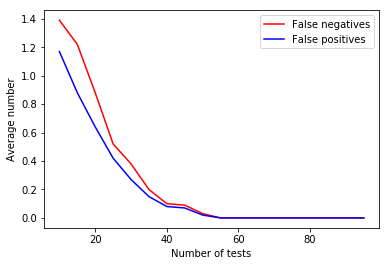

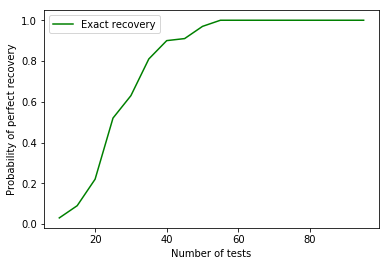

In [48]:
x = np.arange(10,n,5)
# plot of false positive and false negatives 
plt.plot(x,faln,'r', label = 'False negatives')
plt.plot(x,falp, 'b', label = 'False positives')
plt.xlabel('Number of tests')
plt.ylabel('Average number')
#plt.title("The number of exactly recovered vectors vs different values of m")
plt.legend()
plt.show()

#  separate plot for the exact recovery 
plt.plot(x,exa, 'g', label = "Exact recovery")
plt.xlabel('Number of tests')
plt.ylabel('Probability of perfect recovery')
plt.legend()
plt.show()